In [1]:
# 필요 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### 데이터 준비

In [2]:
num_points = 1000
vectors_set = []
for i in range(num_points):
    x_= np.random.normal(.0, .5)
    y_= x1 * .1 + .3 + np.random.normal(.0, .03)
    vectors_set.append([x_, y_])

X_train = np.array([v[0] for v in vectors_set])
y_train = np.array([v[1] for v in vectors_set])

In [3]:
X_train = X_train.reshape([-1, 1])
y_train = y_train.reshape([-1, 1])

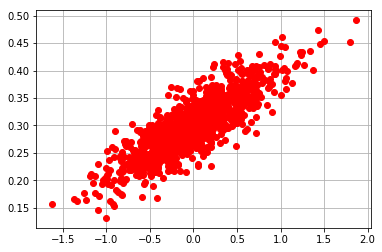

In [4]:
# 원본 데이어 시각화
plt.plot(X_train, y_train, 'ro')
plt.grid(True)
plt.show()

In [5]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)

$$y^{(i)} = x^{(i)}*w^{(i)} + b^{(i)}$$ 

In [6]:
# 변수 초기화
w = weight_variable([1])
b = bias_variable([1])

x = tf.placeholder(tf.float32, shape=[None, 1])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = x * w + b

Instructions for updating:
Colocations handled automatically by placer.


손실함수(loss function)는 평균제곱오차(MSE, Mean Square Error)를 활용합니다.

$$MSE = \frac{1}{2m} \sum_{i=1}^{m} (t^{(i)} - y^{(i)})^2$$
$$\underset{w, b}{\operatorname{argmin}}{MSE}$$

In [7]:
cross_entropy = tf.reduce_mean(tf.square(y - t))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cross_entropy)

In [8]:
# 초기화
epochs = 40
init = tf.global_variables_initializer()
sess = tf.Session() # 세션 시작
sess.run(init)

# 학습과정 시각화를 위한 리스트
w_list = []
b_list = []

for epoch in range(epochs):
    if (epoch+1)%10 == 0: # epoch 10번마다 저장
        w_list.append(sess.run(w))
        b_list.append(sess.run(b))
        
    sess.run(train_step, feed_dict={
        x: X_train,
        t: y_train
    })

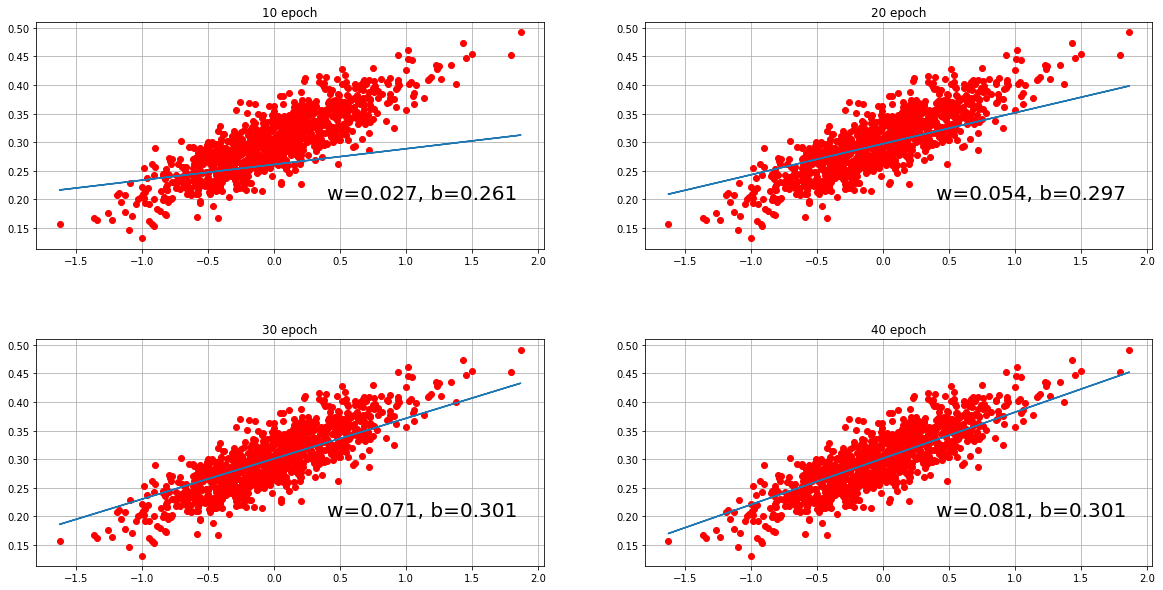

In [9]:
# 학습과정 시각화
def visualize(X_train, y_train, w_list, b_list, index):
    plt.subplot(2, 2, index+1)
    plt.title('{} epoch'.format(10*(index+1)))
    plt.plot(X_train, y_train, 'ro')
    plt.plot(X_train, w_list[index][0] * X_train + b_list[index][0])
    plt.text(0.4, 0.2, 'w={}, b={}'.format(round(float(w_list[index][0]), 3), round(float(b_list[index][0]), 3)),
             fontsize=20)
    plt.grid(True)
# Setting
plt.figure(figsize=(20, 10))
plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
plt.subplots_adjust(hspace = .4)

for index in range(4):
    visualize(X_train, y_train, w_list, b_list, index)
plt.show()

In [10]:
# 세션 종료
sess.close()